<a href="https://colab.research.google.com/github/Rajat-Sri/EDA-on-Airbnb-Dataset/blob/main/Airbnb_Dataset_Analysis_Rajat_Srivastava_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Which room type is prefered in most popular neighbourhood?

# **Data Importing**

In [4]:
# Importing necessary libraries for analysing the dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Importing dataset from drive
airbnb_data = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/EDA on Airbnb Dataset - Rajat Srivastava/Airbnb NYC 2019.csv')
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Understanding Dataset**

In [7]:
# Checking the shape of datset

airbnb_data.shape

(48895, 16)

In [8]:
#Checking name of all the columns indexes

airbnb_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
#Checking for categorical columns indexes

cat_cols = airbnb_data.select_dtypes(include = 'object').columns
cat_cols

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

In [10]:
# Checking for numeric/ non categorical columns indexes

num_cols = airbnb_data.select_dtypes(exclude = 'object').columns
num_cols

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [11]:
# Checking first 5 rows of the dataset

airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [12]:
# Checking the last 5 rows of the dataset

airbnb_data.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [13]:
# Checking the information of the dataset

airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# **Data Cleaning**

In [14]:
# Checking total number of missing values in each column index

airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Observations -

1.   Less than 1% data is missing in name and host_name columns.
2.   Around 20% data is missing in last_review and reviews_per_month columns.
3.   id and name column will not be used in EDA,as they will not be helpful in 
     our analysis.

In [15]:
# Filling missing values

airbnb_data['host_name'].fillna('Absent', inplace =  True)

In [16]:
# Create new dataset and drop the unncessary columns.

airbnb_data_new = airbnb_data.drop(['id','name','last_review'], axis =1)
airbnb_data_new.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [17]:
#Checking for any duplicate rows in dataset

airbnb_data_new.duplicated().sum()

0

In [18]:
# Checking the descriptive statistics 

airbnb_data_new.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [19]:
# Checking price column for outliers

airbnb_data_new.agg({'price':['mean','median','min','max','count']})

,price
mean,152.720687
median,106.000000
min,0.000000
max,10000.000000
count,48895.000000


From descriptive data it is clearly visible that price of some properties are 0,which is not possible as no property on Airbnb is for free.

There are some properties which are way too expensive than others.Though prices of such properties can be relevant but  mean can be skewed by such outlier values. 

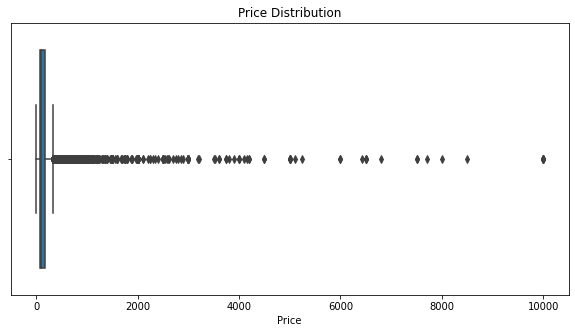

In [20]:
#Plotting the boxplot of the price data and check for outliers

plt.figure(figsize=(10,5))
ax = sns.boxplot(x='price', data=airbnb_data_new).set_title('Price Distribution')
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True)
plt.xlabel('Price')
plt.show()

From above visual representation,we can observe outliers present in the data. We need to remove such outliers by dropping 10th and 90th percentile of the price column from the dataset.

In [21]:
# low quantile value
q_low = airbnb_data_new['price'].quantile(0.10)
q_low

49.0

In [22]:
#high quantile value
q_high = airbnb_data_new['price'].quantile(0.9)
q_high

269.0

From the above calculation it is evident that we need to work on dataset having price range between 49 - 269, for better analysis, so that mean did not get skewed by the outliers.

In [23]:
#removing the values below 10th percentile and above 90th percentile

airbnb_data_new = airbnb_data_new.drop(airbnb_data_new[airbnb_data_new['price']<q_low].index)
airbnb_data_new = airbnb_data_new.drop(airbnb_data_new[airbnb_data_new['price']>q_high].index)

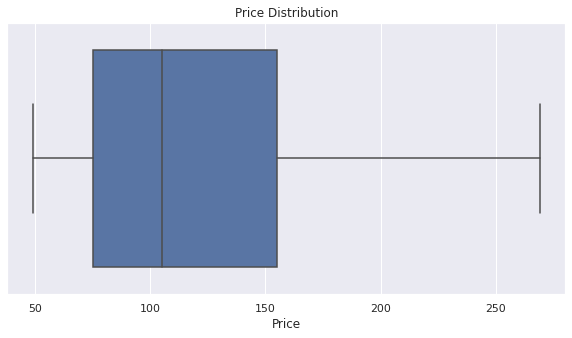

In [24]:
#Lets create a new boxplot and check the result.

plt.figure(figsize=(10,5))
ax = sns.boxplot(x='price', data=airbnb_data_new).set_title('Price Distribution')
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True)

plt.xlabel('Price')
plt.show()

Now Price column has no outliers and ready to use for further data analysis.

In [25]:
# Replacing 20% missing values in 'reviews_per_month' column with median of that column

airbnb_data_new['reviews_per_month'] = airbnb_data_new['reviews_per_month'].fillna(airbnb_data_new['reviews_per_month'].mean())

In [26]:
# Checking for null values again before moving along with further analysis

airbnb_data_new.isnull().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Our dataset is all ready for data analysis and visualization.

# **Exploring the data to answer the following questions.**

## 1. What can we learn about different hosts and areas?

In [27]:
# A. Host having most listings and in which neighbourhood group?

top_hosts = airbnb_data_new.groupby(['host_id','host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = top_hosts.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(9)
top_hosts

,host_id,host_name,neighbourhood_group,calculated_host_listings_count
29368,219517861,Sonder (NYC),Manhattan,327
25106,107434423,Blueground,Manhattan,232
16900,30283594,Kara,Manhattan,121
26500,137358866,Kazuya,Manhattan,103
26501,137358866,Kazuya,Queens,103
12500,16098958,Jeremy & Laura,Manhattan,96
11107,12243051,Sonder,Manhattan,96
22009,61391963,Corporate Housing,Manhattan,91
14812,22541573,Ken,Brooklyn,87


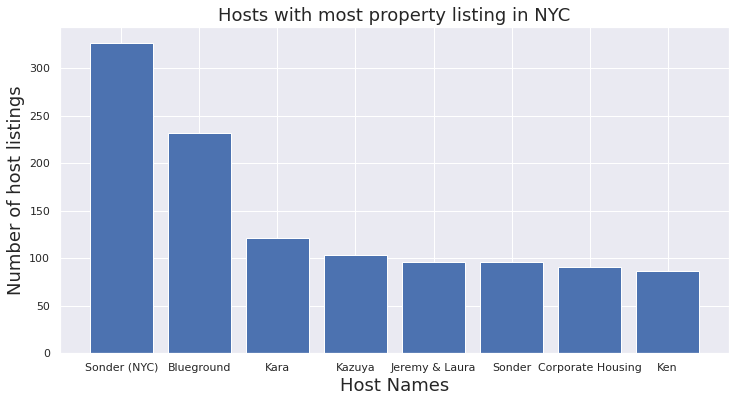

In [28]:
# Visualizing hosts with most number of property listings.

plt.rcParams['figure.figsize'] = (12,6)
host_name = top_hosts['host_name']
host_lisitng = top_hosts['calculated_host_listings_count']
plt.bar(host_name,host_lisitng)
plt.title('Hosts with most property listing in NYC',{'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of host listings',{'fontsize':18})
plt.show()

**Observation 1**

Sonder(NYC) has most number of property listings with 327 properties in Manhattan neighbourhood group

In [29]:
# B. Number of Airbnb listed in each neighbourhood?

airbnb_total = airbnb_data_new.groupby(['neighbourhood_group'])['host_id'].count().reset_index().rename(columns = {'host_id':'count'}).sort_values(by='count', ascending = False)
airbnb_total.head()

,neighbourhood_group,count
2,Manhattan,17513
1,Brooklyn,16373
3,Queens,4413
0,Bronx,758
4,Staten Island,278


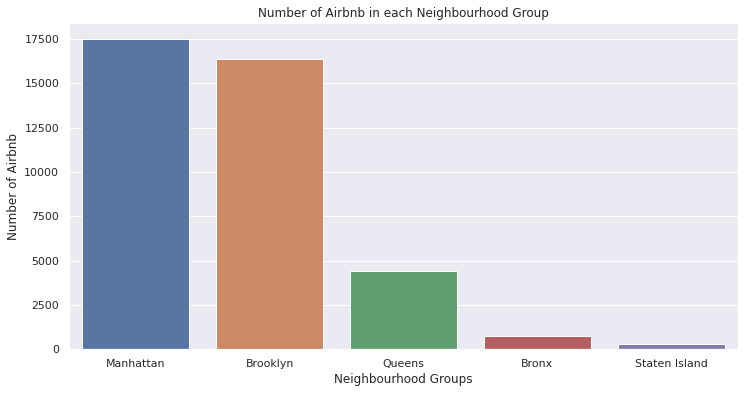

In [30]:
# Visualizing the number of listings in each neighbourhood through bar plot
plt.rcParams['figure.figsize'] = (12,6)
ax = sns.barplot(x = airbnb_total['neighbourhood_group'], y = airbnb_total['count'], data = airbnb_total)
ax.set_xlabel('Neighbourhood Groups')
ax.set_ylabel('Number of Airbnb')
ax.set_title('Number of Airbnb in each Neighbourhood Group')
plt.show()

**Observation 2**

Most number of Airbnb are present in Manhattan followed by Brooklyn, 86-87% of Airbnb revenue is generated from these two neighbouhood groups.

Least number of Airbnb are present in Queens,Bronx and Staten Island, which are not even able to generate 15% of the company revenue.

In [31]:
#C. Lets find the neighbourhoods with most listings
df1 = airbnb_data_new.groupby(['neighbourhood_group','neighbourhood'])['host_id'].count().nlargest(10)
df1

neighbourhood_group  neighbourhood     
Brooklyn             Williamsburg          3415
                     Bedford-Stuyvesant    2963
Manhattan            Harlem                2311
Brooklyn             Bushwick              1846
Manhattan            Upper West Side       1619
                     East Village          1590
                     Hell's Kitchen        1576
                     Upper East Side       1561
Brooklyn             Crown Heights         1257
Manhattan            Midtown               1002
Name: host_id, dtype: int64

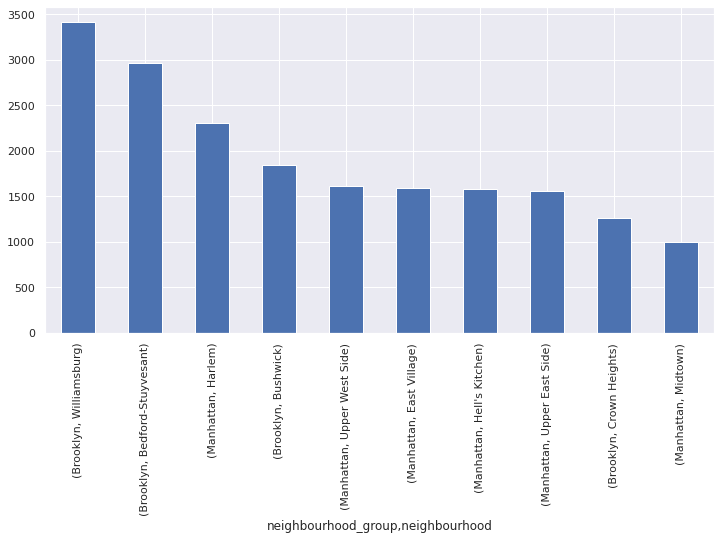

In [32]:
# Visualizing the top 10 neighbourhood listings through bar plot

visual=df1.plot(kind='bar')
visual

**Observation 3**

The neighborhoods with the most listings are in Brooklyn and Manhattan. Williamsburg, in Brooklyn, appears first with 3,415 listings. In Manhattan, Harlem has the most listings, totaling 2,311 listings.

## 2. What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [33]:
# A. Neighbourhood group which has got maximum number of reviews?

neighbourhood_group_reviews = airbnb_data_new.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)
neighbourhood_group_reviews

,neighbourhood_group,number_of_reviews
2,Manhattan,607
1,Brooklyn,488
3,Queens,474
0,Bronx,321
4,Staten Island,242


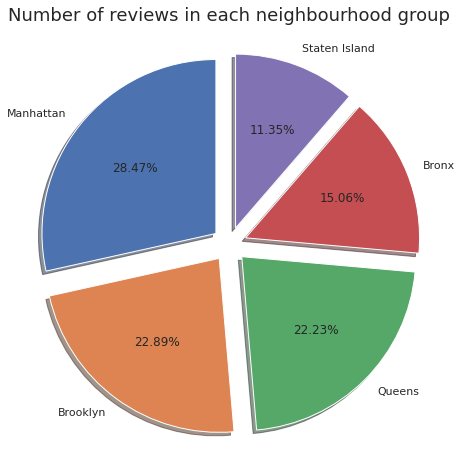

In [34]:
# Visualising the number of reviews in each neighbourhood group through pie chart

plt.rcParams['figure.figsize'] = (13,8)
reviews = neighbourhood_group_reviews['number_of_reviews']
plt.pie(reviews, labels = neighbourhood_group_reviews['neighbourhood_group'], autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True )
plt.title('Number of reviews in each neighbourhood group', {'fontsize': 18})
plt.show()

**Observation 4**

From above pie chart it is clear that Manhattan followed by Brooklyn and Queens are most popular among airbnb guests.

In [35]:
# B. Average Price distribution in each neighbourhood groups?

neighbourhood_group_avg_prices = airbnb_data_new.groupby(['neighbourhood_group'])['price'].mean().reset_index().sort_values(by = 'price', ascending = False)
neighbourhood_group_avg_prices

,neighbourhood_group,price
2,Manhattan,138.378804
1,Brooklyn,110.887620
3,Queens,97.330614
4,Staten Island,96.798561
0,Bronx,89.456464


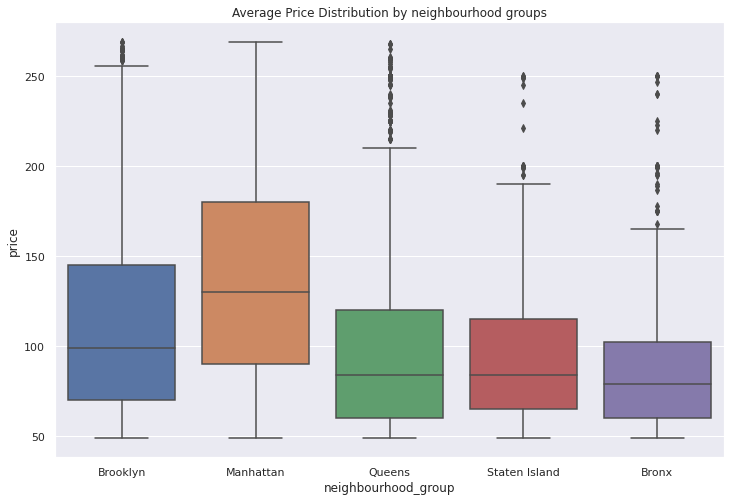

In [36]:
# Average Price distribution by neighbourhood gropus

plt.figure(figsize=(12,8))
ax = sns.boxplot(x="neighbourhood_group", y="price", data=airbnb_data_new).set_title('Average Price Distribution by neighbourhood groups')
plt.show()

**Observation 5**

From above analysis its clear that Manhattan followed by Brooklyn and Queens are the costliest neighbourhood groups.

Where as Bronx followed by Staten Island are the cheapest of the neighbourhood groups.

In [37]:
# C. One night charges of different room types at each neighbourhood group

neighbourhood_group_room_costs=airbnb_data_new.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
neighbourhood_group_room_costs

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,109.040936,73.282443,74.608696
Brooklyn,141.084910,78.462759,91.660194
Manhattan,167.890292,99.263047,85.137143
Queens,126.232134,75.010229,80.923077
Staten Island,112.331210,75.888889,98.750000


Text(0.5, 1.0, 'One Night Charges across NYC')

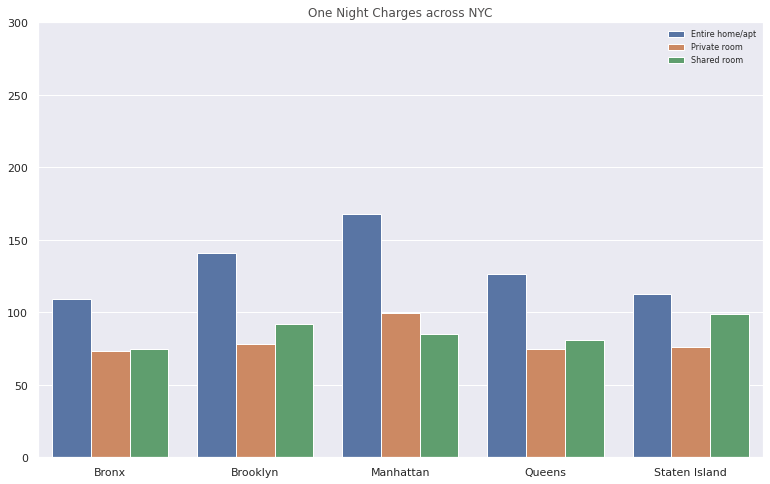

In [38]:
# Visualising one night charges of different room types at each neighbourhood group using bar graph

sns.barplot(data = airbnb_data_new.groupby(['neighbourhood_group','room_type']).price.mean().reset_index(),x = 'neighbourhood_group',y = 'price',hue = 'room_type')
plt.rcParams['figure.figsize'] = (10,5)
plt.legend(loc="upper right", frameon=False, fontsize= 8)
plt.ylim(0,300)
plt.xlabel('')
plt.ylabel('')
plt.title('One Night Charges across NYC', size = 12,color ='#4f4e4e')

room_type
Entire home/apt    151.863615
Private room        86.131510
Shared room         85.635338
Name: price, dtype: float64


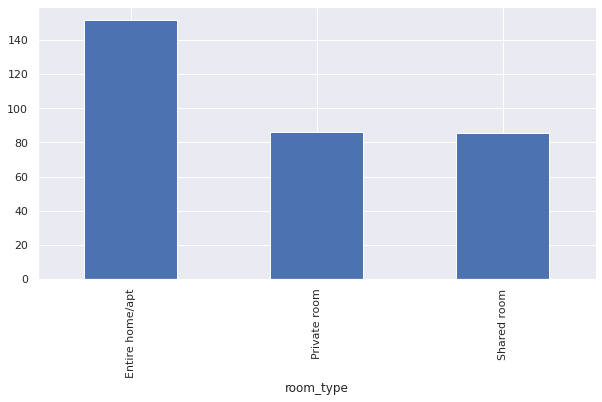

In [39]:
# Visualising price comparison of different room types

room_costs=airbnb_data_new.groupby(['room_type'])['price'].mean()
print(room_costs)
visualx=room_costs.plot(kind='bar')
visualx

**Observation 6**

From above graphs it is noticible that, as a result of high popularity entire home room type is the costliest.

## 3. Which hosts are the busiest and why?

In [40]:
# A. Busiest Hosts in NYC?

#Busiest hosts would be those who have maximum number of reviews per month as people are booking frequently at those hosts.

busiest_hosts = airbnb_data_new.groupby(['host_name','host_id','neighbourhood_group','neighbourhood'])['reviews_per_month'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='reviews_per_month', ascending=False).head()
busiest_hosts

,host_name,host_id,neighbourhood_group,neighbourhood,reviews_per_month
26238,Row NYC,244361589,Manhattan,Theater District,58.50
22677,Nalicia,156684502,Queens,Springfield Gardens,19.75
4362,Brent,217379941,Queens,Springfield Gardens,15.78
17560,Lakshmee,232251881,Queens,Jamaica,15.32
1322,Alina,259630588,Brooklyn,Williamsburg,14.00


<BarContainer object of 5 artists>

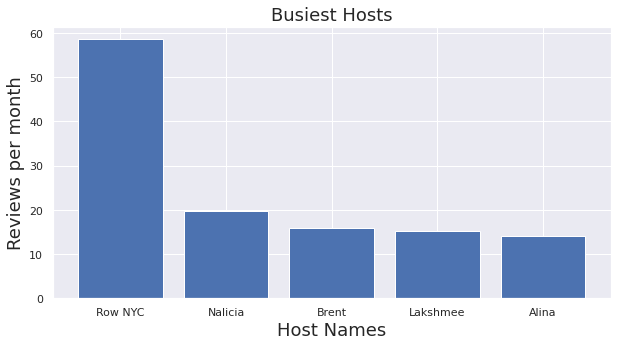

In [41]:
# Visualising the busiest hosts data through bar plot.

host_name = busiest_hosts['host_name']
reviews = busiest_hosts['reviews_per_month']
plt.title('Busiest Hosts', {'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Reviews per month',{'fontsize':18})
plt.bar(host_name, reviews)

<BarContainer object of 5 artists>

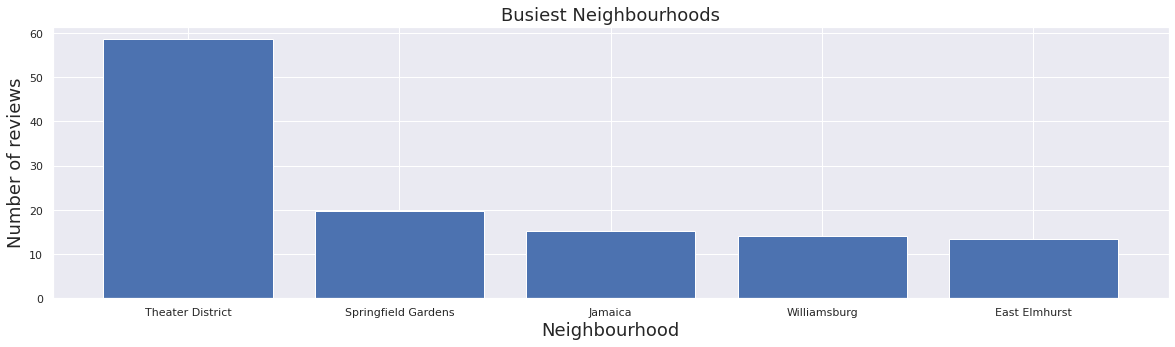

In [42]:
# Visualising the busiest neighbourhoods through bar plot.

neighbourhood_group = airbnb_data_new.groupby(['neighbourhood_group','neighbourhood'])['reviews_per_month'].max().reset_index().sort_values(by = 'reviews_per_month', ascending = False).head()
busiest_neighbourhood = neighbourhood_group['neighbourhood']
reviews = neighbourhood_group['reviews_per_month']
plt.rcParams['figure.figsize'] = (20,5)
plt.title('Busiest Neighbourhoods', {'fontsize':18})
plt.xlabel('Neighbourhood',{'fontsize':18})
plt.ylabel('Number of reviews',{'fontsize':18})
plt.bar(busiest_neighbourhood, reviews)

**Observation 7**

Host name 'Row NYC' is the busiest host located in the Theater District present in Manhattan neighbourhood group.
Its location at the heart of Times Square with a bustling,brightly lit area having broadway shows,chain of restaurants and full of tourist makes it the busiest host all across NYC.

## 4. Which room type is prefered in most popular neighbourhood?

In [43]:
# A. Most listed room types across NYC

airbnb_rooms =airbnb_data_new['room_type'].value_counts()
airbnb_rooms

Entire home/apt    20926
Private room       17877
Shared room          532
Name: room_type, dtype: int64

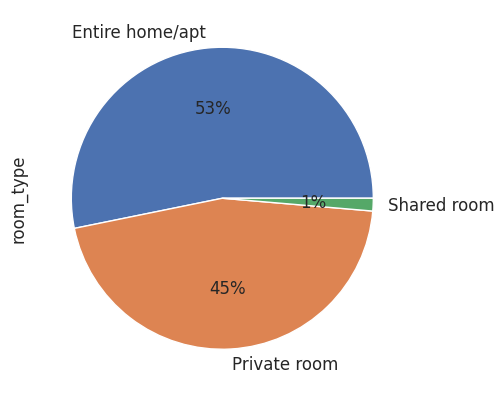

In [44]:
# Plotting pie chart to look for which are most listed room types.

fig = plt.figure(figsize=(5,5), dpi=100)
airbnb_data_new['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=12)

Text(0, 0.5, 'Latitude')

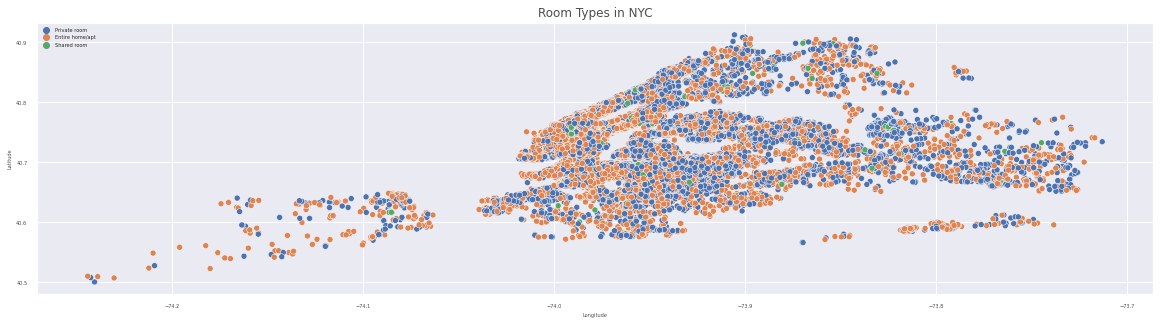

In [45]:
# Vizualising the room types in the NYC city on map

sns.scatterplot(data= airbnb_data_new, x  = 'longitude',y = 'latitude', hue = 'room_type')
plt.legend(loc="upper left", frameon=False, fontsize= 5)
plt.title('Room Types in NYC', size=12, color='#4f4e4e')
plt.xticks(size=5, color='#4f4e4e')
plt.yticks(size=5, color='#4f4e4e')
plt.xlabel('Longitude',size=5, color='#4f4e4e')
plt.ylabel('Latitude',size=5, color='#4f4e4e')

**Observation 8**

Entire home/apt type are most listed and popular room types followed by single room types.

Shared room types are least listed and less preferred room types as they are not much in depand and more over expensive as well.(as seen in observation 6).

In [46]:
#B. Number of different room types in each neighbourhood groups

room_type_neighbourhood_group=airbnb_data_new.groupby(['neighbourhood_group','room_type'])['room_type'].count().unstack()
room_type_neighbourhood_group

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,342,393,23
Brooklyn,8456,7814,103
Manhattan,10054,7109,350
Queens,1917,2444,52
Staten Island,157,117,4


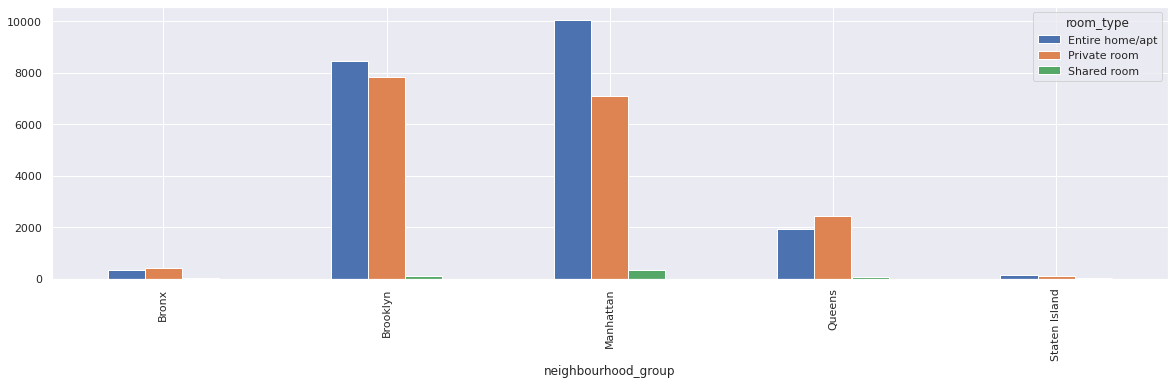

In [47]:
# Visualization of different room types in each neighbourhood groups

visual1=room_type_neighbourhood_group.plot(kind='bar')
visual1

**Observatio 9**

Entire home/apt is most preffered room type in most popular neighbourhood groups of Manhattan and Broklyn followed by Staten Island.

Where as private rooms are preferred in Queens and Bronx.

# 5. Analyze data for defaulter Airbnbs(Availability: less than 100 days a year)

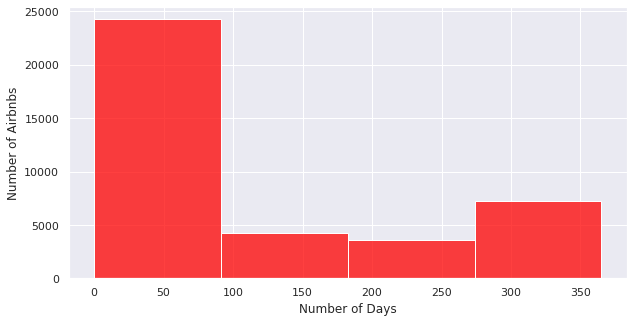

In [48]:
#A. Histogram to see availability of airbnbs round the year.

plt.rcParams['figure.figsize'] = (10,5)
hp = sns.histplot(airbnb_data_new['availability_365'], color= 'red', bins=4)
hp.set_xlabel('Number of Days') 
hp.set_ylabel('Number of Airbnbs')
plt.show()

In [49]:
# Lets find the total number of defaulter airbnbs across NYC

defaulter_count = airbnb_data_new[airbnb_data_new['availability_365']<100] #Defaulter airbnbs are those which are operating less than 100 days in an year.
defaulter_count['availability_365'].count()

24598

**Observation 10**

Around 60% of airbnbs are open for less than 100 days across the year. This is alarming to companies reputation and companies growth.

In [50]:
#B. Lets find out total count of defaulter airbnbs in each neighbourhood groups.

defaulter_count_neighbourhood_group =defaulter_count.groupby(['neighbourhood_group'])['host_id'].count().reset_index().rename(columns = {'host_id':'count'}).sort_values(by='count', ascending = False)
defaulter_count_neighbourhood_group

,neighbourhood_group,count
2,Manhattan,11161
1,Brooklyn,10753
3,Queens,2257
0,Bronx,333
4,Staten Island,94


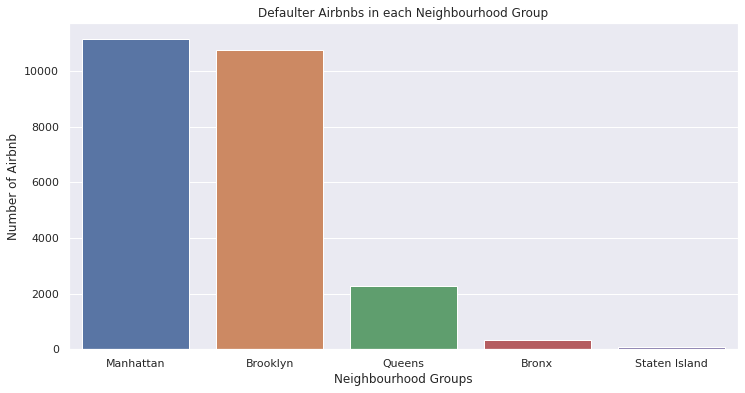

In [51]:
# Visualizing the defaulters each neighbourhood through bar plot

plt.rcParams['figure.figsize'] = (12,6)
ax = sns.barplot(x = defaulter_count_neighbourhood_group['neighbourhood_group'], y = defaulter_count_neighbourhood_group['count'], data = defaulter_count_neighbourhood_group)
ax.set_xlabel('Neighbourhood Groups')
ax.set_ylabel('Number of Airbnb')
ax.set_title('Defaulter Airbnbs in each Neighbourhood Group')
plt.show()

**Observation 11**

Though most of the listings of airbnbs and revenue generated from Manhattan and Brooklyn, the percentage of defaulters is very high which is alarming to companies growth and reputation.Actions need to be taken to cope up with this scanario.

# 6. Average number of days people stay in different room types

In [52]:
#A.  Average stay in different roon types
min_nights=airbnb_data_new.groupby('room_type')['minimum_nights'].mean().reset_index()
min_nights

,room_type,minimum_nights
0,Entire home/apt,8.536462
1,Private room,4.680595
2,Shared room,4.678571


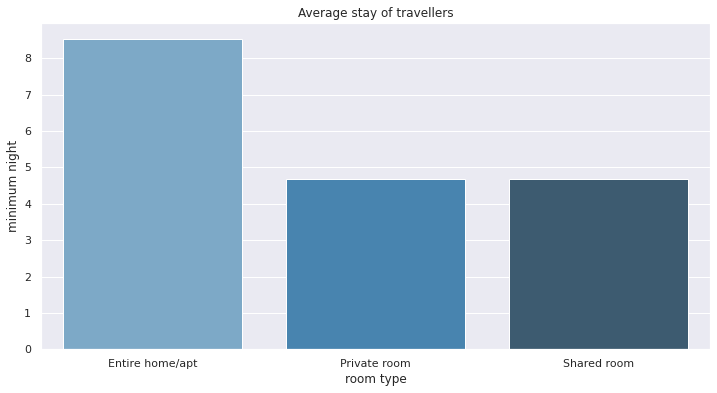

In [53]:
#Plot for room type based on average night stay.

visual2=sns.barplot(x='room_type',y='minimum_nights',data=min_nights,palette="Blues_d")
visual2.set_title('Average stay of travellers')
visual2.set_ylabel('minimum night')
visual2.set_xlabel('room type')
visual2.set_xticks(visual2.get_xticks())

**Observation 12**

For longer stay people preffered Entire home/apt type.

# 7. Top 3 popular hosts in different neighbourhood groups.

In [54]:
#A. Most favourite hosts in Manhattan

manhattan_favourite=airbnb_data_new.loc[airbnb_data_new['neighbourhood_group']=='Manhattan'].reset_index()
manhattan_favourite=manhattan_favourite.groupby(['neighbourhood_group','neighbourhood','host_name'])['reviews_per_month'].max().reset_index().sort_values('reviews_per_month',ascending=False)
manhattan_favourite=manhattan_favourite[0:3]
manhattan_favourite

,neighbourhood_group,neighbourhood,host_name,reviews_per_month
7811,Manhattan,Theater District,Row NYC,58.50
8936,Manhattan,Upper West Side,Ben,13.13
7773,Manhattan,Theater District,Jae,12.05


In [55]:
#B. Most favourite hosts in Bronx.

bronx_favourite=airbnb_data_new.loc[airbnb_data_new['neighbourhood_group']=='Bronx'].reset_index()
bronx_favourite=bronx_favourite.groupby(['neighbourhood_group','neighbourhood','host_name'])['reviews_per_month'].max().reset_index().sort_values('reviews_per_month',ascending=False)
bronx_favourite=bronx_favourite[0:3]
bronx_favourite

,neighbourhood_group,neighbourhood,host_name,reviews_per_month
524,Bronx,Throgs Neck,Luis,10.34
84,Bronx,Clason Point,Yoselyn,8.62
502,Bronx,Schuylerville,Sharon & Erika,8.37


In [56]:
#C. Most favourite hosts in Brooklyn.

brooklyn_favourite=airbnb_data_new.loc[airbnb_data_new['neighbourhood_group']=='Brooklyn'].reset_index()
brooklyn_favourite=brooklyn_favourite.groupby(['neighbourhood_group','neighbourhood','host_name'])['reviews_per_month'].max().reset_index().sort_values('reviews_per_month',ascending=False)
brooklyn_favourite=brooklyn_favourite[0:3]
brooklyn_favourite

,neighbourhood_group,neighbourhood,host_name,reviews_per_month
8387,Brooklyn,Williamsburg,Alina,14.00
2972,Brooklyn,Bushwick,Stephanie,13.33
4305,Brooklyn,Crown Heights,Meeks,11.84


In [57]:
#D. Top 3 favourite hosts in Queens.

queens_favourite=airbnb_data_new.loc[airbnb_data_new['neighbourhood_group']=='Queens'].reset_index()
queens_favourite=queens_favourite.groupby(['neighbourhood_group','neighbourhood','host_name'])['reviews_per_month'].max().reset_index().sort_values('reviews_per_month',ascending=False)
queens_favourite=queens_favourite[0:3]
queens_favourite

,neighbourhood_group,neighbourhood,host_name,reviews_per_month
2723,Queens,Springfield Gardens,Nalicia,19.75
2695,Queens,Springfield Gardens,Brent,15.78
1628,Queens,Jamaica,Lakshmee,15.32


In [58]:
#E. Top 3 favourite hosts in Staten Island

staten_Island_favourite=airbnb_data_new.loc[airbnb_data_new['neighbourhood_group']=='Staten Island'].reset_index()
staten_Island_favourite=staten_Island_favourite.groupby(['neighbourhood_group','neighbourhood','host_name'])['reviews_per_month'].max().reset_index().sort_values('reviews_per_month',ascending=False)
staten_Island_favourite=staten_Island_favourite[0:3]
staten_Island_favourite

,neighbourhood_group,neighbourhood,host_name,reviews_per_month
115,Staten Island,Rosebank,Wendy,9.10
22,Staten Island,Clifton,Linda,8.43
116,Staten Island,Rosebank,Yun,7.18


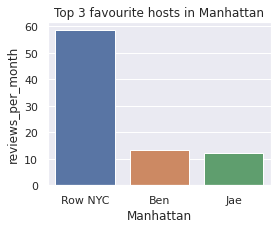

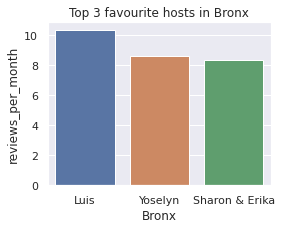

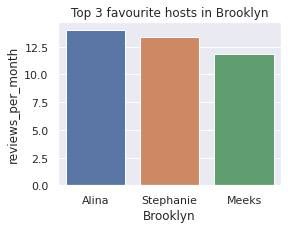

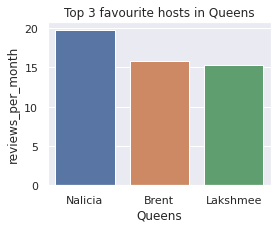

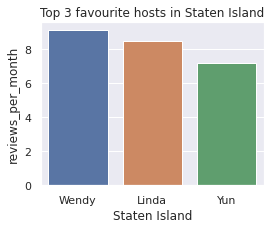

In [59]:
# Bar graph representation

plt.rcParams['figure.figsize'] = (4,3)

ax = sns.barplot(x = manhattan_favourite['host_name'], y = manhattan_favourite['reviews_per_month'], data = manhattan_favourite)
ax.set_xlabel('Manhattan')
ax.set_ylabel('reviews_per_month')
ax.set_title('Top 3 favourite hosts in Manhattan')
plt.show()

ax = sns.barplot(x = bronx_favourite['host_name'], y = bronx_favourite['reviews_per_month'], data = bronx_favourite)
ax.set_xlabel('Bronx')
ax.set_ylabel('reviews_per_month')
ax.set_title('Top 3 favourite hosts in Bronx')
plt.show()

ax = sns.barplot(x = brooklyn_favourite['host_name'], y = brooklyn_favourite['reviews_per_month'], data = brooklyn_favourite)
ax.set_xlabel('Brooklyn')
ax.set_ylabel('reviews_per_month')
ax.set_title('Top 3 favourite hosts in Brooklyn')
plt.show()

ax = sns.barplot(x = queens_favourite['host_name'], y = queens_favourite['reviews_per_month'], data = queens_favourite)
ax.set_xlabel('Queens')
ax.set_ylabel('reviews_per_month')
ax.set_title('Top 3 favourite hosts in Queens')
plt.show()

ax = sns.barplot(x = staten_Island_favourite['host_name'], y = staten_Island_favourite['reviews_per_month'], data = staten_Island_favourite)
ax.set_xlabel('Staten Island')
ax.set_ylabel('reviews_per_month')
ax.set_title('Top 3 favourite hosts in Staten Island')
plt.show()

**Observation 13**

Top hosts in different neighbourhood groups are - 

1.   Manhattan -	Row Nyc,Ben,Jae	
2.   Bronx - 	Luis,Yoselyn,Sharon and Erika
3.   Brooklyn - Alina,Staphanie,Meeks
4.   Queens - Nalicia,Brent,Lakshmee
5.   Staten Island - Wendy,Linda,Yun

# **Key Findings:** 

**Observation 1** - Sonder(NYC) has most number of property listings with 327 properties in Manhattan neighbourhood group

**Observation 2** - Most number of Airbnb are present in Manhattan followed by Brooklyn, 86-87% of Airbnb revenue is generated from these two neighbouhood groups.Least number of Airbnb are present in Queens,Bronx and Staten Island, which are not even able to generate 15% of the company revenue.

**Observation 3** - The neighborhoods with the most listings are in Brooklyn and Manhattan. Williamsburg, in Brooklyn, appears first with 3,415 listings. In Manhattan, Harlem has the most listings, totaling 2,311 listings.

**Observation 4** - Manhattan followed by Brooklyn and Queens are most popular among airbnb guests.

**Observation 5** - Manhattan followed by Brooklyn and Queens are the costliest neighbourhood groups.Where as Bronx followed by Staten Island are the cheapest of the neighbourhood groups.

**Observation 6** - As a result of high popularity entire home room type is the costliest.

**Observation 7** - Host name 'Row NYC' is the busiest host located in Theater District present in Manhattan neighbourhood group. Its location at the heart of Times Square with a bustling,brightly lit areas having broadway shows,chain of restaurant and full of tourist makes it the busiest host all across NYC.

**Observation 8** - Entire home/apt type are most listed and popular room types followed by single room types.Shared room types are least listed and less preferred room types as they are not much in depand and more over expensive as well.(as seen in observation 6).

**Observation 9** - Entire home/apt is most preffered room type in most popular neighbourhood groups of Manhattan and Broklyn followed by Staten Island.Where as private rooms are preferred in Queens and Bronx.

**Observation 10** - Around 60% of airbnbs are open for less than 100 days across the year. This is alarming to companies reputation and companies growth.

**Observation 11** - Though most of the listings of airbnbs and revenue genearted from Manhattan and Brooklyn, but percentage of defaulters is very high which is alarming to companies growth and reputation.Actions needs to be taken to cope up with this scanario.

**Observation 12** - For longer stay people preffered Entire home/apt type.

**Observation 13** - Popular hosts in different neighbourhood groups are -
*   **Manhattan** - Row Nyc,Ben,Jae
*   **Bronx** - Luis,Yoselyn,Sharon and Erika
*   **Brooklyn** - Alina,Staphanie,Meeks
*   **Queens** - Nalicia,Brent,Lakshmee
*   **Staten Island** - Wendy,Linda,Yun

***# Conclusions:***

# **1. Hosts eligible for airbnb awards for the year 2019.**

  **A. Host with highest number of listings on Airbnb**
  
  Sonder(NYC) with 327 properties.

  **B. Top 3 most popular host in entire NYC.**
  
  Row Nyc, Nalicia, Brent

  **C.Top 3 most popular host in Manhattan.**

  Row Nyc, Ben, Jae

  **D.Top 3 most popular host in Brooklyn.**

  Alina, Stephanie, Meeks

  **E.Top 3 most popular host in Bronx.**

  Luis, Yoselyn, Sharon & Erika

  **F.Top 3 most popular host in Queens.**

  Nalicia, Brent, Lakshmee

  **G.Top 3 most popular host in Staten Island.**

  Wendy, Linda, Yun

#  **2.Popularity on various parameters**
  
  **A.Popularity of Neighbourhood groups**

  Manhattan > Brooklyn > Queens > Bronx > Staten Island

  **B.Popularity of Neighbourhoods**

  Theater District > Springfield Gardens > Jamaica > Williamsburg	> East Elmhurst

  **C.Room Type popularity based on average stay**

  Entire home/apt>Private room>Shared room

#  **3.Availability on various parameters**

  **A.Neighbourhood groups with most listings**

  Manhattan > Brooklyn > Queens > Bronx > Staten Island

  **B.Neighbourhoods with most listings**

  Williamsburg(Brooklyn)>Bedford-Stuyvesant(Brooklyn)>Harlem(Manhattan)>Bushwick(Brooklyn)>Upper West Side(Manhattan)

  **C.Room types with most listings**

  Entire home/apt>Private room>Shared room

#  **4.Price comparison on various parameters**

**A.Price comparison of rooms types**

  Entire home/apt>Private room>Shared room

**B.Price comparison of rooms across neighbourhood groups**

  Manhattan > Brooklyn > Queens > Staten Island > Bronx

# **5.Defaulters(available less than 100days/year.)**

**A.Total defaulters comparison across neighbourhood groups**

 Manhattan > Brooklyn > Queens > Bronx > Staten Island 